In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

In [2]:
## Read data

print ("Reading images...")
vehicle_images = glob.glob('./vehicles/*/*.png')
non_vehicle_images = glob.glob('./non-vehicles/*/*.png')

vehicle_images_arr = []
non_vehicle_images_arr = []


for img_path in vehicle_images:
    img = cv2.imread(img_path)
    vehicle_images_arr.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
for img_path in non_vehicle_images:
    img = cv2.imread(img_path)
    non_vehicle_images_arr.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
print("...done!")

print("Vehicle Images: " + str(len(vehicle_images_arr)))
print("Non-Vehicle Images: " + str(len(non_vehicle_images_arr)))


Reading images...
...done!
Vehicle Images: 8792
Non-Vehicle Images: 8968


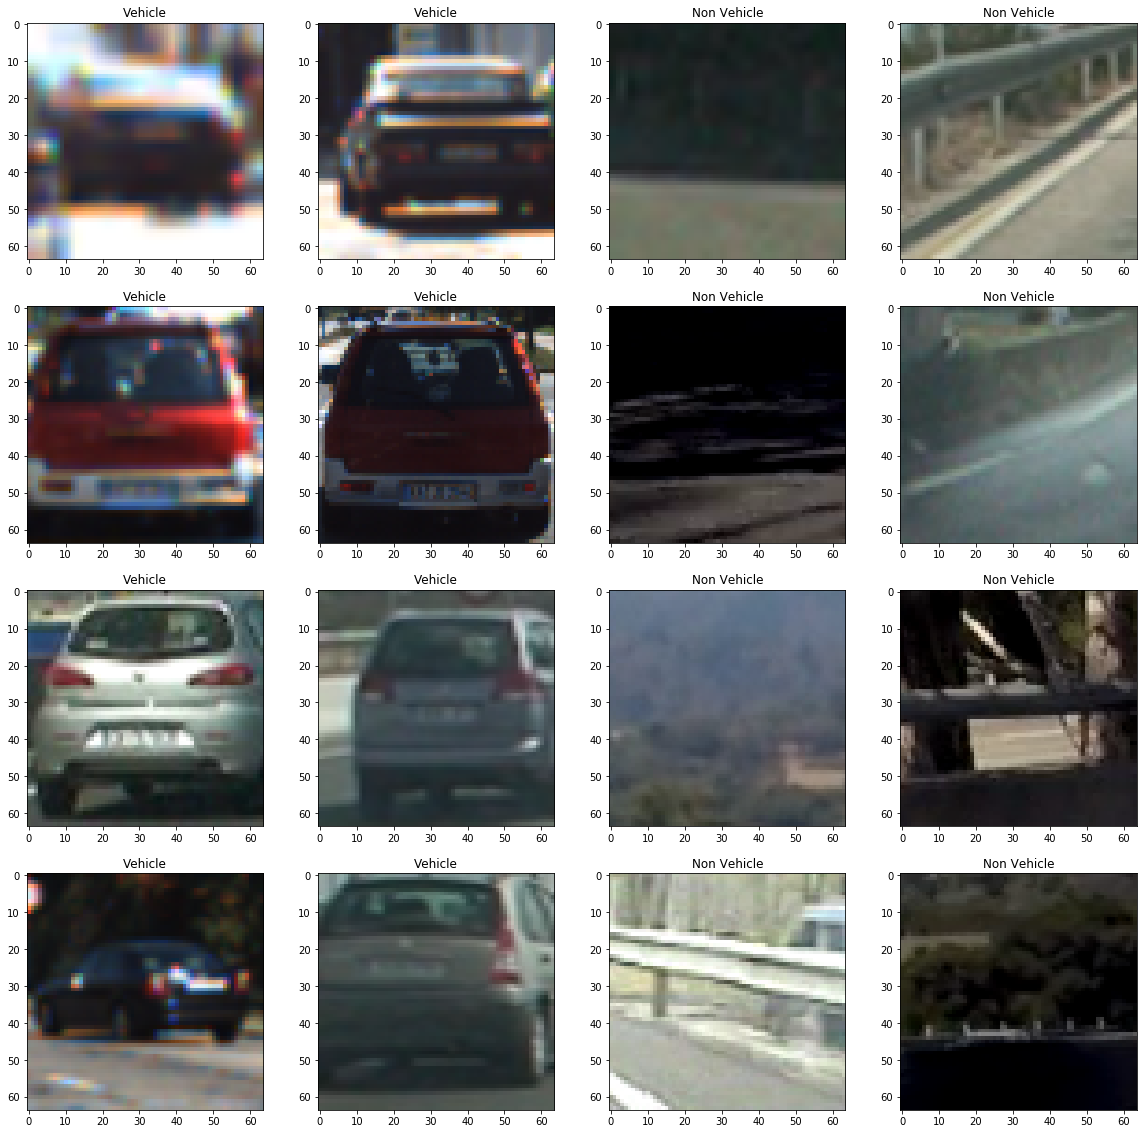

In [3]:
## Let's visualize some of the images

f, axes = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    vehicle1 = random.randint(0, len(vehicle_images_arr) - 1)
    vehicle2 = random.randint(0, len(vehicle_images_arr) - 1)

    non_vehicle1 = random.randint(0, len(non_vehicle_images_arr) - 1)
    non_vehicle2 = random.randint(0, len(non_vehicle_images_arr) - 1)

    axes[i,0].set_title("Vehicle")
    axes[i,0].imshow(vehicle_images_arr[vehicle1])
    
    axes[i,1].set_title("Vehicle")
    axes[i,1].imshow(vehicle_images_arr[vehicle2])
    
    axes[i,2].set_title("Non Vehicle")
    axes[i,2].imshow(non_vehicle_images_arr[non_vehicle1])
    
    axes[i,3].set_title("Non Vehicle")
    axes[i,3].imshow(non_vehicle_images_arr[non_vehicle2])
    

In [4]:
## Features

# Color Spaces
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    channel_0 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel_1 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel_2 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = channel_0[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel_0[0], channel_1[0], channel_2[0]))
    # Return the individual histograms, bin_centers and feature vector
    return channel_0, channel_1, channel_2, bin_centers, hist_features

HLS Colorspace
RGB Colorspace
YUV Colorspace


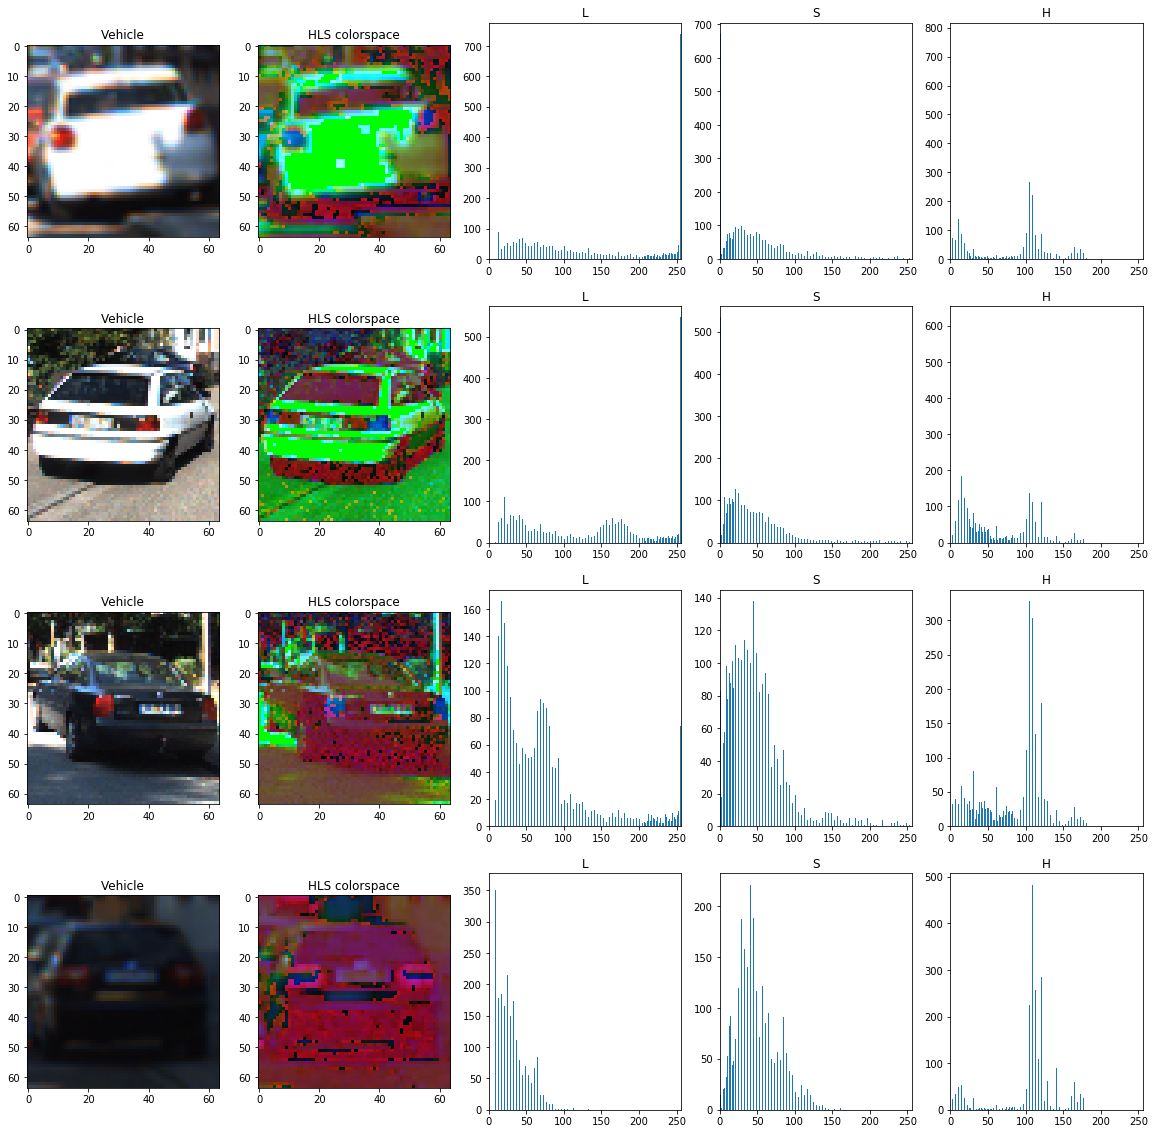

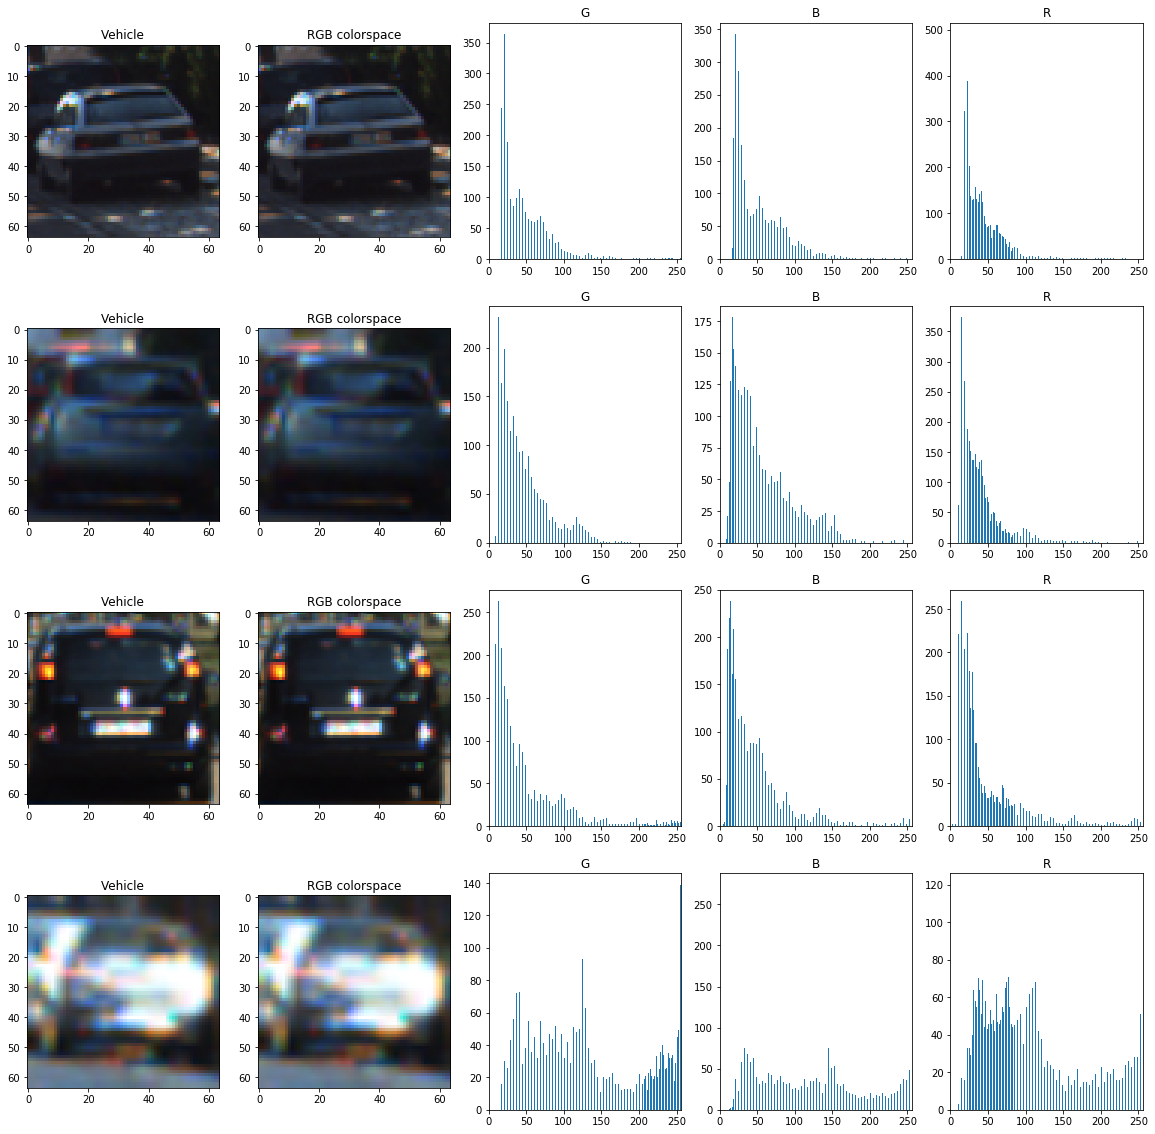

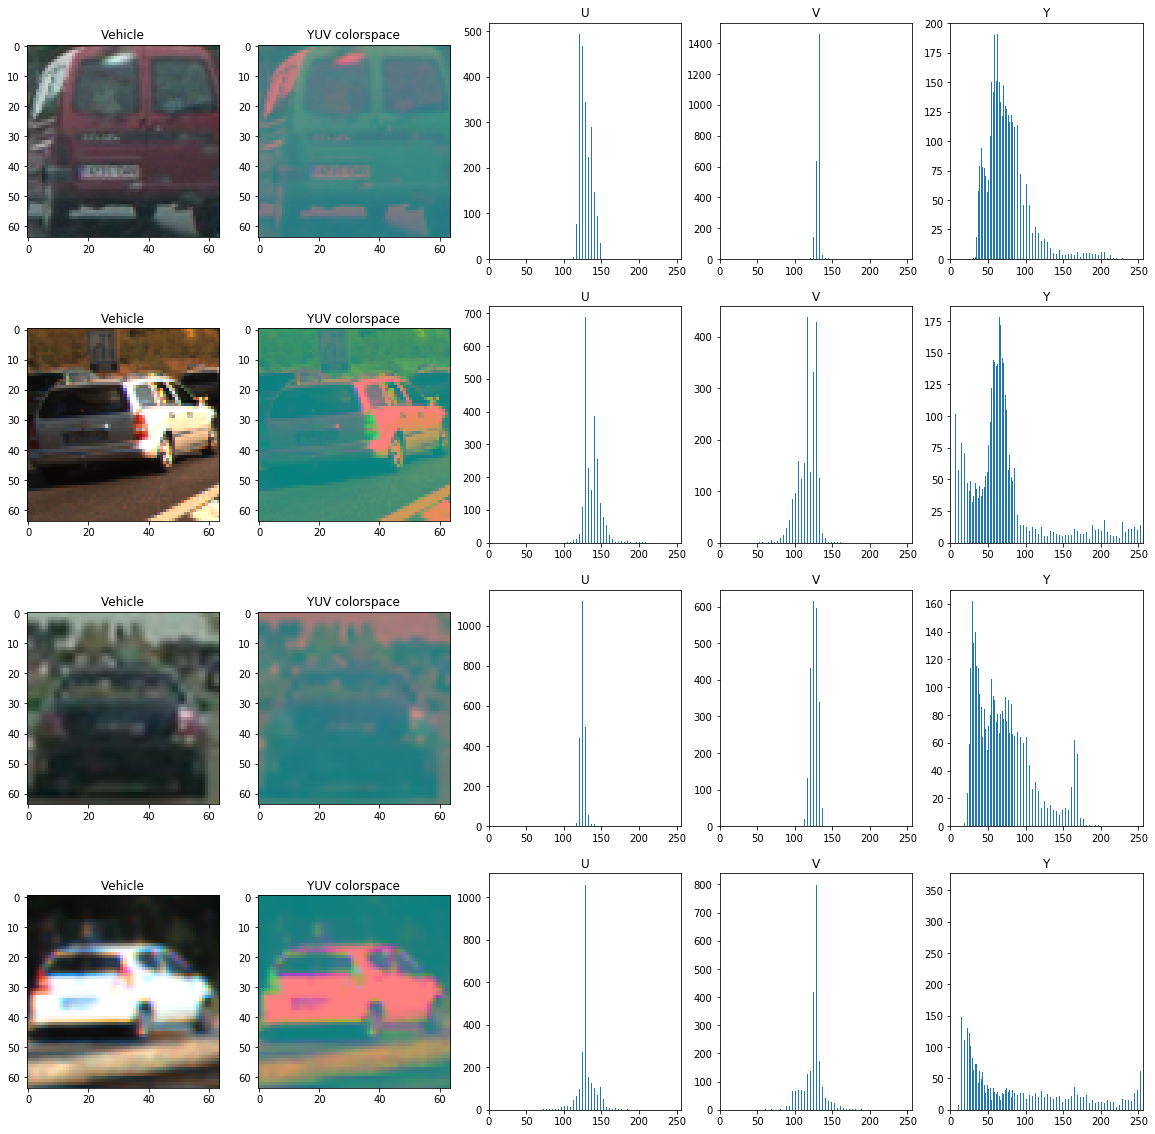

In [5]:
## Visualize the vehicle color features

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("HLS Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    # Trying the HLS colorspace
    img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2HLS)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("H")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("L")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("S")
    axes[i,1].imshow(img)
    axes[i,1].set_title("HLS colorspace")


f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("RGB Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    # Trying the RGB colorspace
    img = vehicle_images_arr[vehicle]
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("R")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("G")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("B")
    axes[i,1].imshow(img)
    axes[i,1].set_title("RGB colorspace")

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("YUV Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    # Trying the YUV colorspace
    img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2YUV)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("V")
    axes[i,1].imshow(img)
    axes[i,1].set_title("YUV colorspace")

HLS Colorspace
RGB Colorspace
YUV Colorspace
Number of features: 384
Number of features: 384
Number of features: 384
Number of features: 384


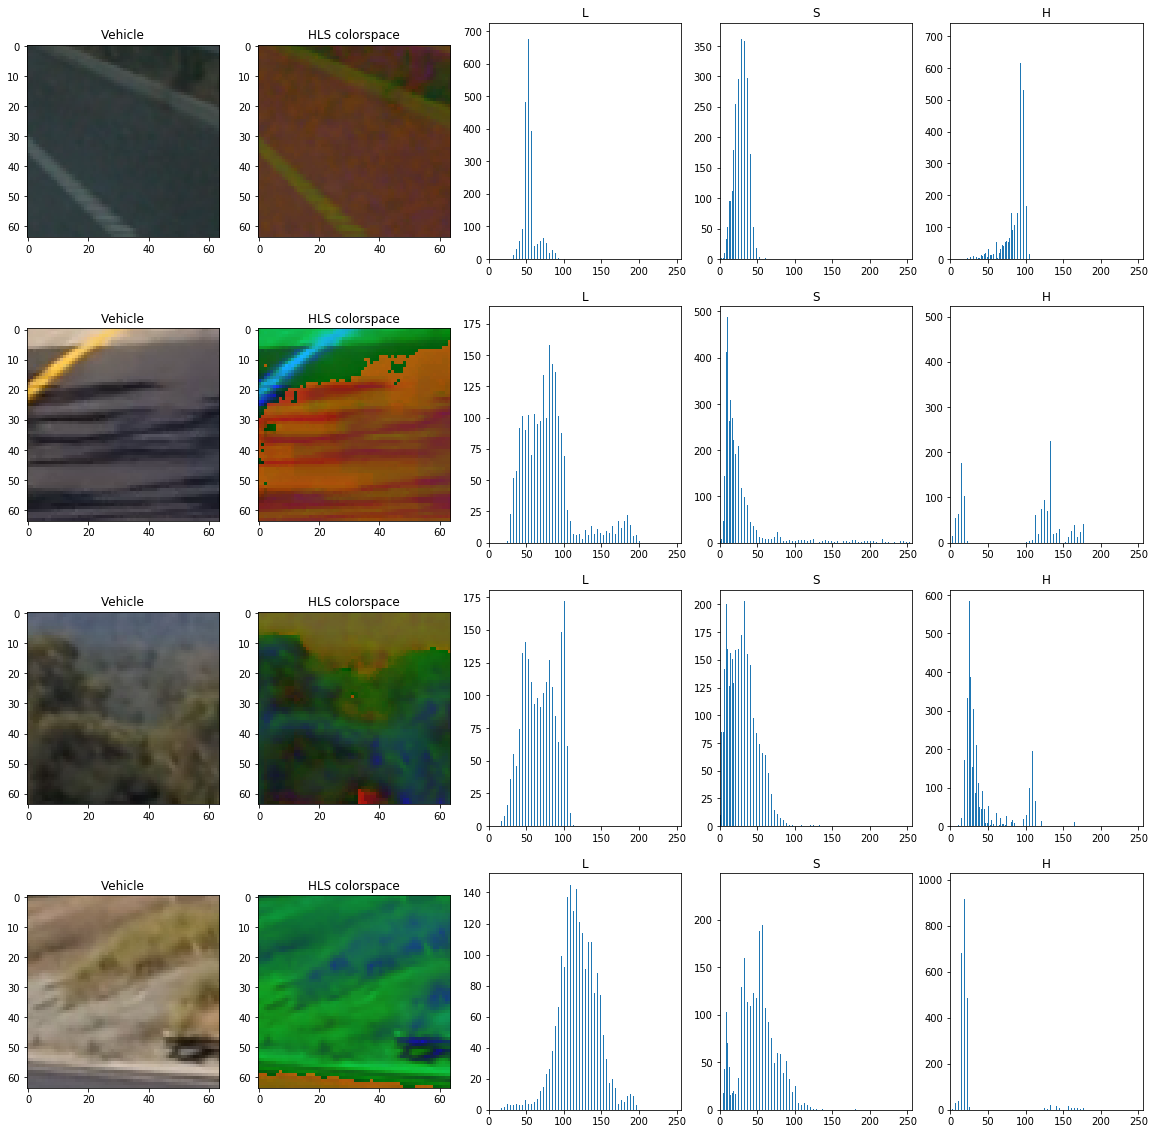

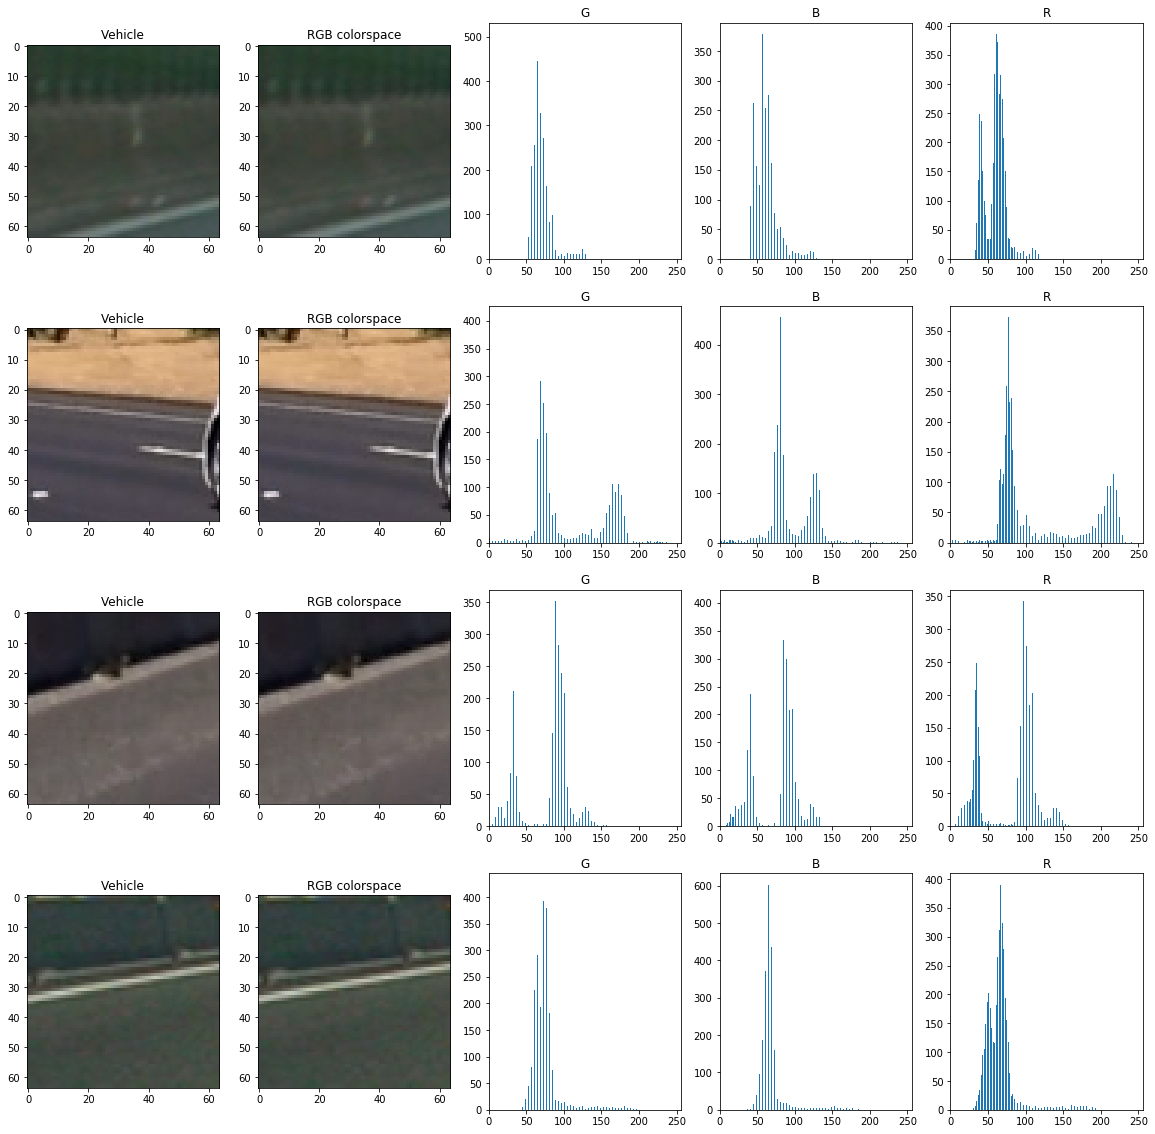

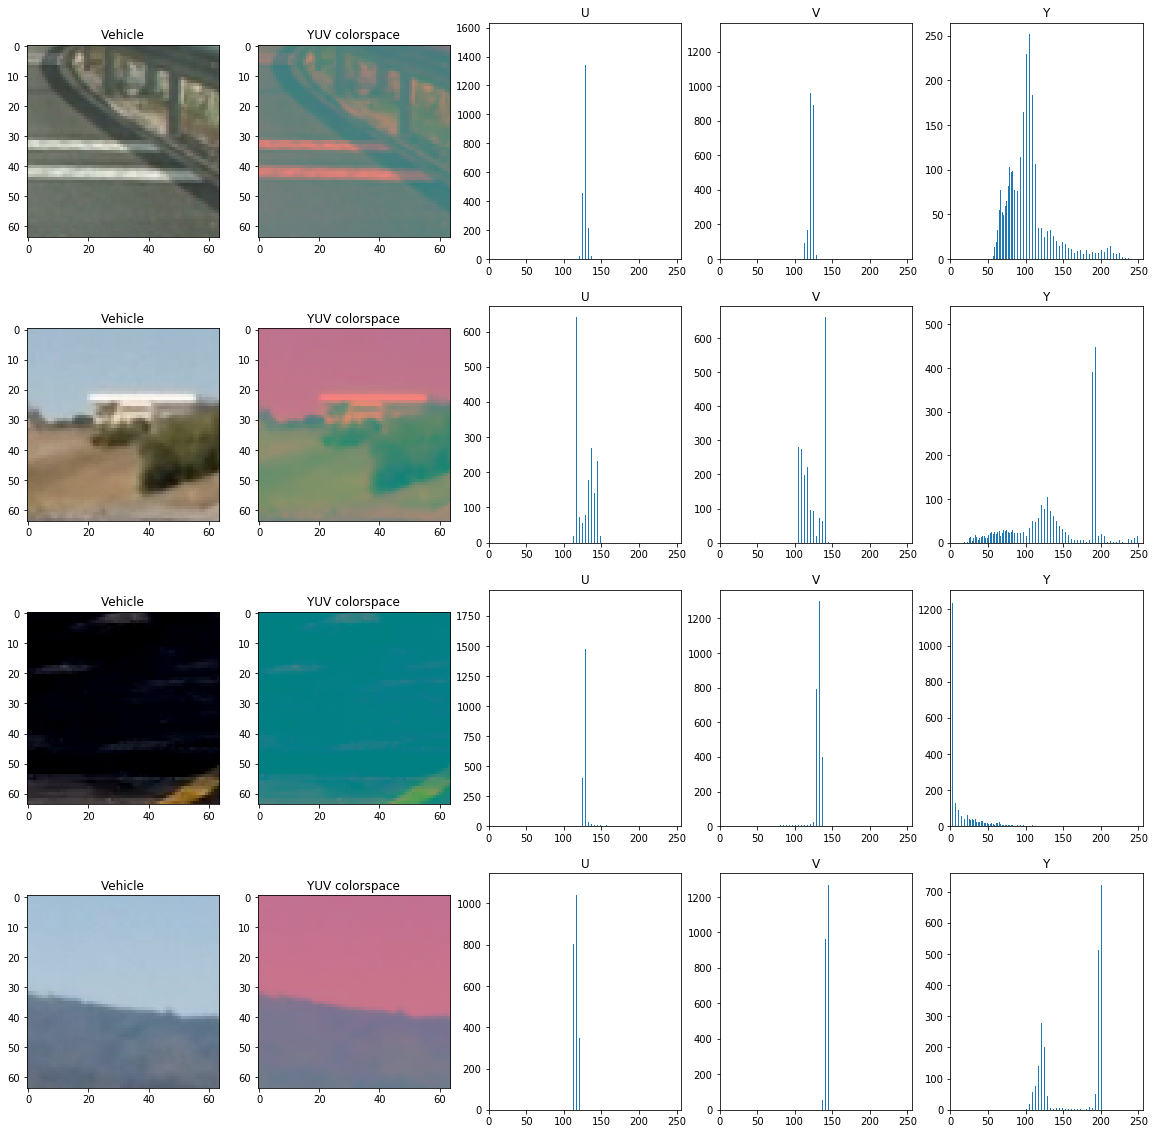

In [6]:
## Visualize the non-vehicles color features

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("HLS Colorspace")
for i in range(4):
    non_vehicle = random.randint(0, len(non_vehicle_images_arr) - 1)

    # Trying the HLS colorspace
    img = cv2.cvtColor(non_vehicle_images_arr[non_vehicle],cv2.COLOR_RGB2HLS)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(non_vehicle_images_arr[non_vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("H")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("L")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("S")
    axes[i,1].imshow(img)
    axes[i,1].set_title("HLS colorspace")


f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("RGB Colorspace")
for i in range(4):
    non_vehicle = random.randint(0, len(non_vehicle_images_arr) - 1)

    # Trying the RGB colorspace
    img = non_vehicle_images_arr[non_vehicle]
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(non_vehicle_images_arr[non_vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("R")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("G")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("B")
    axes[i,1].imshow(img)
    axes[i,1].set_title("RGB colorspace")

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("YUV Colorspace")
for i in range(4):
    non_vehicle = random.randint(0, len(non_vehicle_images_arr) - 1)

    # Trying the YUV colorspace
    img = cv2.cvtColor(non_vehicle_images_arr[non_vehicle],cv2.COLOR_RGB2YUV)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(non_vehicle_images_arr[non_vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("V")
    axes[i,1].imshow(img)
    axes[i,1].set_title("YUV colorspace")
    
    print("Number of features: " + str(len(hist_features)))

In [7]:
## Spatial Binning
def bin_spatial(img, color_space='YUV', size=(16, 16)):
    # Convert image to new color space (if specified)
    if color_space != 'YUV':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'RGB':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2RGB)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

## GET another image
vehicle = random.randint(0, len(vehicle_images_arr) - 1)
img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2YUV)

feature_list = bin_spatial(img)

print("Number of features after spatial binning: " + str(len(feature_list)))

Number of features after spatial binning: 768


In [8]:
## Hog features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [9]:
def GetFeaturesFromHog(image,orient,cellsPerBlock,pixelsPerCell, visualise= False, feature_vector_flag=True):
    if(visualise==True):
        hog_features, hog_image = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=True, feature_vector=feature_vector_flag)
        return hog_features, hog_image
    else:
        hog_features = hog(image, orientations=orient,
                          pixels_per_cell=(pixelsPerCell, pixelsPerCell), 
                          cells_per_block=(cellsPerBlock, cellsPerBlock), 
                          visualise=False, feature_vector=feature_vector_flag)
        return hog_features

Text(0.5,1,'HOG Visualization')

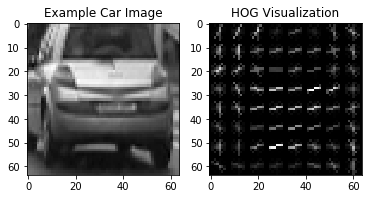

In [10]:
from skimage.feature import hog

# Let's test the HOG feature class 
img = vehicle_images_arr[200]
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

features, hog_image = get_hog_features(img, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')





/Users/papiot/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Feature Vector Length Returned is  324
No of features that can be extracted from image  4096


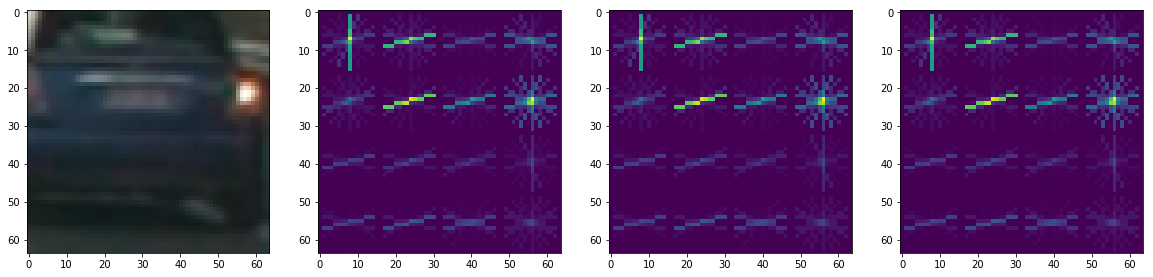

In [11]:
image=vehicle_images_arr[1]
image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
image_channel_0=image[:,:,0]
image_channel_1=image[:,:,0]
image_channel_2=image[:,:,0]

feature_0,hog_img_0=GetFeaturesFromHog(image_channel_0,9,2,16,visualise=True,feature_vector_flag=True)
feature_1,hog_img_1=GetFeaturesFromHog(image_channel_1,9,2,16,visualise=True,feature_vector_flag=True)
feature_2,hog_img_2=GetFeaturesFromHog(image_channel_2,9,2,16,visualise=True,feature_vector_flag=True)

f, axes= plt.subplots(1,4,figsize=(20,10))
axes[0].imshow(vehicle_images_arr[1])
axes[1].imshow(hog_img_0)
axes[2].imshow(hog_img_1)
axes[3].imshow(hog_img_2)


print("Feature Vector Length Returned is ",len(feature_0))
print("No of features that can be extracted from image ",len(hog_img_0.ravel()))

In [12]:
def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell, convertColorspace=False):
    featureList=[]
    imageList=[]
    for image in images:
        if(convertColorspace==True):
            image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        local_features_1=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False, True)
        local_features_2=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False, True)
        local_features_3=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False, True)
        x=np.hstack((local_features_1,local_features_2,local_features_3))
        featureList.append(x)
    return featureList

In [13]:
import time

orientations=9
cellsPerBlock=2
pixelsPerBlock=16
convertColorSpace=True

sample_size = 8000
cars = vehicle_images_arr[0:sample_size]
notcars = non_vehicle_images_arr[0:sample_size]
t=time.time()
car_features = ExtractFeatures(vehicle_images_arr,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
notcar_features = ExtractFeatures(non_vehicle_images_arr,orientations,cellsPerBlock,pixelsPerBlock, convertColorSpace)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')

/Users/papiot/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


46.15 Seconds to extract HOG features...


In [14]:
## Training and splitting data

from sklearn.model_selection import train_test_split


# Create an array stack of feature vectors
X = np.vstack([car_features, notcar_features])

print("Shape of features list is ", X.shape)

# Define the labels vector
y = np.concatenate([np.ones(len(car_features)), np.zeros(len(notcar_features))])

print("Shape of label list is ", y.shape)


# Split up data into randomized training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

Shape of features list is  (17760, 972)
Shape of label list is  (17760,)


In [17]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Train

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)



# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 8000
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

2.22 Seconds to train SVC...
Test Accuracy of SVC =  0.9806
My SVC predicts:  [0. 0. 0. ... 1. 0. 1.]
For these 8000 labels:  [0. 0. 0. ... 1. 0. 1.]
0.00593 Seconds to predict 8000 labels with SVC


In [18]:
import matplotlib.image as mpimg

# Draw box
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [19]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.9, 0.9)):
   
    if x_start_stop[0] == None:
        x_start_stop[0]=0
    if x_start_stop[1] == None:
        x_start_stop[1]=img.shape[1]
    if y_start_stop[0] ==  None:
        y_start_stop[0]= 0
    if y_start_stop[1] ==  None:
        y_start_stop[1]=img.shape[0]
    
    
    window_list = []
    image_width_x= x_start_stop[1] - x_start_stop[0]
    image_width_y= y_start_stop[1] - y_start_stop[0]
     
    windows_x = np.int( 1 + (image_width_x - xy_window[0])/(xy_window[0] * xy_overlap[0]))
    windows_y = np.int( 1 + (image_width_y - xy_window[1])/(xy_window[1] * xy_overlap[1]))
    
    modified_window_size= xy_window
    for i in range(0,windows_y):
        y_start = y_start_stop[0] + np.int( i * modified_window_size[1] * xy_overlap[1])
        for j in range(0,windows_x):
            x_start = x_start_stop[0] + np.int( j * modified_window_size[0] * xy_overlap[0])
            
            x1 = np.int( x_start +  modified_window_size[0])
            y1= np.int( y_start + modified_window_size[1])
            window_list.append(((x_start,y_start),(x1,y1)))
    return window_list

In [20]:
def draw_windows(image, windows, converColorspace=False):
    
    refinedWindows=[]
    for window in windows:
        
        start= window[0]
        end= window[1]
        clippedImage=image[start[1]:end[1], start[0]:end[0]]
        
        if(clippedImage.shape[1] == clippedImage.shape[0] and clippedImage.shape[1]!=0):
            
            clippedImage=cv2.resize(clippedImage, (64,64))
            
            f1=ExtractFeatures([clippedImage], 9 , 2 , 16,converColorspace)
        
            predictedOutput=svc.predict([f1[0]])
            if(predictedOutput==1):
                refinedWindows.append(window)
        
        
    return refinedWindows

Total No of windows are  470


/Users/papiot/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


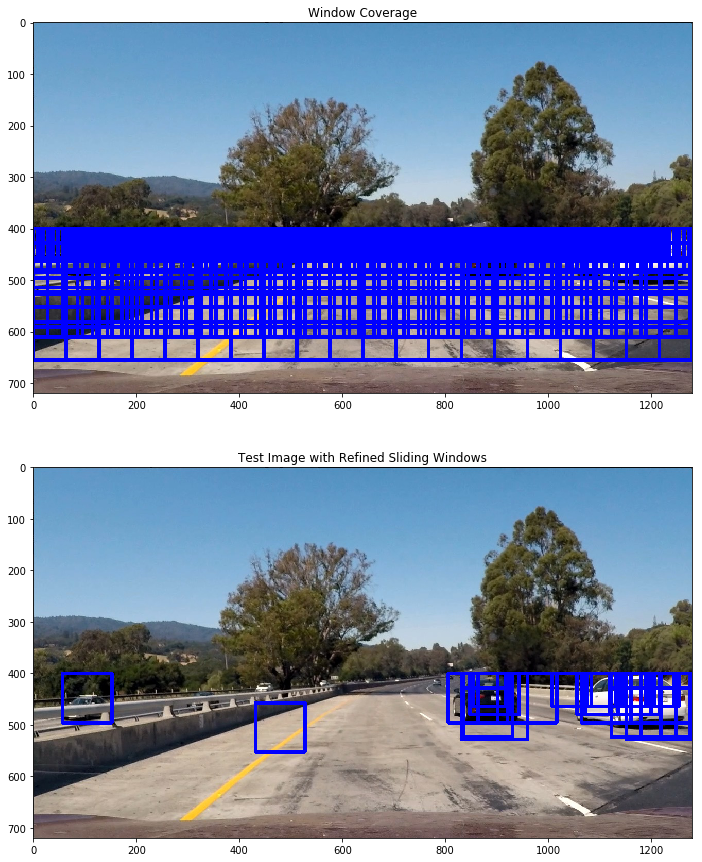

In [28]:
#image = mpimg.imread('test_images/test1.jpg')

image = mpimg.imread('test_images/test1.jpg')

# image = cv2.imread('test_images/test4.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

windows1 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,464], 
                    xy_window=(64,64), xy_overlap=(0.15, 0.15))
windows4 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,480], 
                    xy_window=(80,80), xy_overlap=(0.2, 0.2))
windows2 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,612], 
                    xy_window=(96,96), xy_overlap=(0.3, 0.3))
windows3 = slide_window(image, x_start_stop=[0, 1280], y_start_stop=[400,660], 
                    xy_window=(128,128), xy_overlap=(0.5, 0.5))


windows = windows1 + windows2 +  windows3 + windows4
print("Total No of windows are ",len(windows))
refinedWindows=draw_windows(image,windows, True)



f,axes= plt.subplots(2,1, figsize=(30,15))

window_img = draw_boxes(image, windows) 

axes[0].imshow(window_img)
axes[0].set_title("Window Coverage")

window_img = draw_boxes(image, refinedWindows) 

axes[1].set_title("Test Image with Refined Sliding Windows")
axes[1].imshow(window_img)

In [29]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

In [30]:
# applying a threshold value to the image to filter out low pixel cells

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [31]:
from scipy.ndimage.measurements import label
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

 Number of Cars found -  2


Text(0.5,1,'Final Image after applying Heat Map')

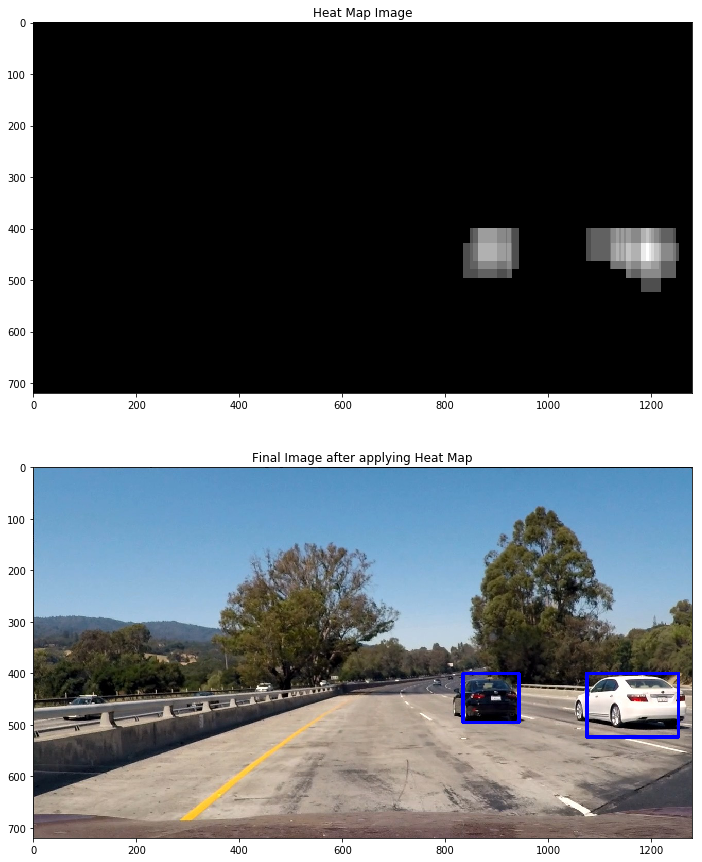

In [32]:
#testing our heat function

heat = np.zeros_like(image[:,:,0]).astype(np.float)

heat = add_heat(heat,refinedWindows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

heat_image=heatmap

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(" Number of Cars found - ",labels[1])
draw_img = draw_labeled_bboxes(np.copy(image), labels)

f,axes= plt.subplots(2,1, figsize=(30,15))
axes[0].imshow(heat_image,cmap='gray')
axes[0].set_title("Heat Map Image")
axes[1].imshow(draw_img)
axes[1].set_title("Final Image after applying Heat Map")

In [33]:
# Defining a class to store the refined frames found from the last 15 frames

class KeepTrack():
    def __init__(self):
        self.refinedWindows = [] 
        
    def AddWindows(self, refinedWindow):
        self.refinedWindows.append(refinedWindow)
        frameHistory=15
        if len(self.refinedWindows) > frameHistory:
            self.refinedWindows = self.refinedWindows[len(self.refinedWindows)-frameHistory:]


In [42]:
#defining the Parameters required for the pipeline to run

orientation=9 # No of orientations of HOG
cellsPerBlock=2 # No of cells per block
pixelsPerCell=16 # No of pixels per cell
xy_window=(64, 64) # window Size
xy_overlap=(0.15, 0.15) # Window Overlap. Please note this is different as provided by Udacity. Overlap of 0.15 means my windows are 85% overlapping with each other
x_start_stop=[0, image.shape[1]] # X Coordinates to start and stop search
y_start_stop=[400, 660] # Y Coordinates to start and stop search

# Window 1- Size - 64x64 , Overlap-85%
windows_normal = slide_window(image, x_start_stop, [400,464], 
                    xy_window, xy_overlap)

# Window 2- Size - 80x80 , Overlap-80%
xy_window_1_25= (80,80)
xy_window_1_25_overlap=(0.2, 0.2)    
windows_1_25 = slide_window(image, x_start_stop, [400,480], 
                    xy_window_1_25, xy_window_1_25_overlap)

# Window 3- Size - 96x96 , Overlap-70%
xy_window_1_5= (96,96)
xy_window_1_5_overlap=(0.3, 0.3)    
windows_1_5 = slide_window(image, x_start_stop, [400,612], 
                    xy_window_1_5, xy_window_1_5_overlap)

# Window 4- Size - 128x128 , Overlap-50%
xy_window_twice_overlap=(0.5, 0.5)    
xy_window_twice = (128,128)
windows_twice = slide_window(image, x_start_stop, [400,660], 
                    xy_window_twice, xy_window_twice_overlap)

# Total Windows - 470
windows= windows_normal +  windows_1_5  + windows_twice +windows_1_25
print("No of Windows are ",len(windows))

No of Windows are  470


In [43]:
# Defining a pipeline for Video Frame Processing
# Note here the track of last 15 frames is kept

def Pipeline(image):
#     features,hog_image=GetFeaturesFromHog(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     features1,hog_image1=GetFeaturesFromHog(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     features2,hog_image2=GetFeaturesFromHog(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, visualise= True, feature_vector_flag=False)
#     refinedWindows=DrawCarsOptimised(hog_image,hog_image1,hog_image2,windows, True)
    
#     image=find_cars(image, 400, 528, 1,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 560, 1.25,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 588, 1.5,  orientation, pixelsPerCell, cellsPerBlock)
#     image=find_cars(image, 400, 660, 2,  orientation, pixelsPerCell, cellsPerBlock)
    rand= random.randint(0,1)
    if(rand<0.4):
        refinedWindows=keepTrack.refinedWindows[:-1]
    else:
        refinedWindows=draw_windows(image,windows, True)
        if len(refinedWindows) > 0:
            keepTrack.AddWindows(refinedWindows)
    
    #refinedWindows=DrawCars(image,windows, True)
#     if len(refinedWindows) > 0:
#         keepTrack.AddWindows(refinedWindows)
            
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for refinedWindow in keepTrack.refinedWindows:
        heat = add_heat(heat, refinedWindow)
    
    
    
    heatmap = apply_threshold(heat, 25 + len(keepTrack.refinedWindows)//2)
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img

In [44]:
# Defining a different pipeline to process the images as we do not want to keep track of previous frames here

def PipelineImage(image):

    refinedWindows=draw_windows(image,windows, True)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat,refinedWindows)
   
    heatmap = np.clip(heat, 0, 255)
    heatmap = apply_threshold(heat, 4)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    return draw_img,heatmap

CPU times: user 8.62 s, sys: 380 ms, total: 9 s
Wall time: 9.48 s


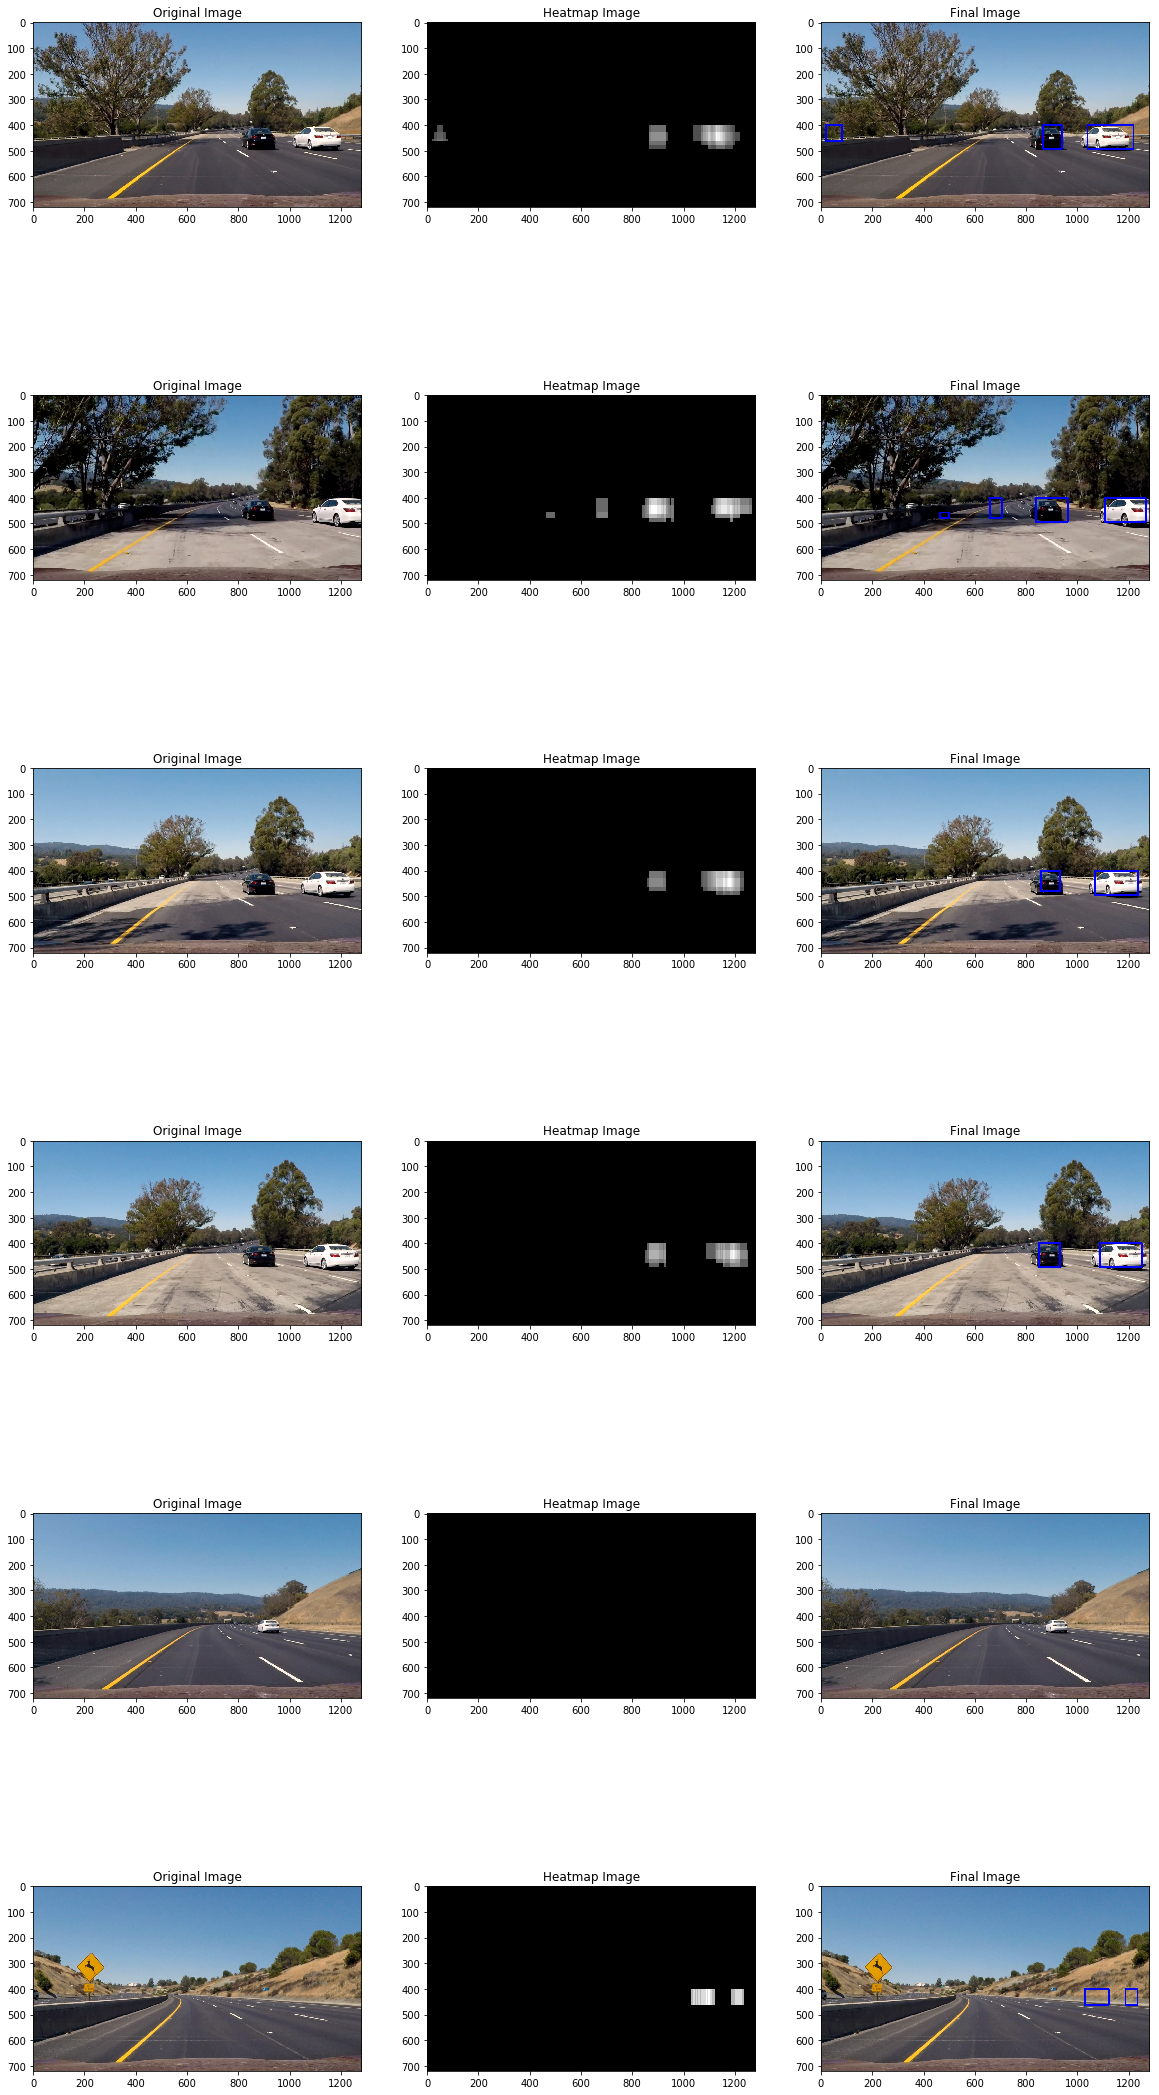

In [45]:
%%time
test_images= glob.glob("./test_images/*.jpg")
f, axes= plt.subplots(6,3, figsize=(20,40))

for index,image in enumerate(test_images):
    image = cv2.imread(image)
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    finalPic,heatmap = PipelineImage(image)
    axes[index,0].imshow(image)
    axes[index,0].set_title("Original Image")
    axes[index,1].imshow(heatmap,cmap='gray')
    axes[index,1].set_title("Heatmap Image")
    axes[index,2].imshow(finalPic)
    axes[index,2].set_title("Final Image")

In [46]:
keepTrack = KeepTrack()
import moviepy
from moviepy.editor import VideoFileClip
video_output1 = 'output_vi.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(Pipeline)
%time processed_video.write_videofile(video_output1, audio=False)
video_input1.reader.close()
video_input1.audio.reader.close_proc()

[MoviePy] >>>> Building video full_video_threshold_20_with_frame_skipping_my.mp4
[MoviePy] Writing video full_video_threshold_20_with_frame_skipping_my.mp4


100%|█████████▉| 1260/1261 [16:09<00:00,  1.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: full_video_threshold_20_with_frame_skipping_my.mp4 

CPU times: user 13min 57s, sys: 14.9 s, total: 14min 12s
Wall time: 16min 11s
